Kinematic model of the Gippsland Basin - Version 4
================

We analyse here uncertainties in a kinematic model of the Gippsland Basin, Victoria. The model is built on the basis of a detailed analysis of the geological history and adjusted to observed structures in the area.

Here, we first evaluate the model and analyse the setting a little bit and then proceed to investigate how errors in the parameterised geological history (i.e. the parameters of the kinematic events) propagate into model uncertainties.



In [1]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [3]:
import sys, os
sys.path.append('../..')
import matplotlib.pyplot as plt
import pynoddy.history
import pynoddy.output
import copy
import pickle
plt.rcParams['font.size'] = 16

In [4]:
pwd

'/home/miguel/PycharmProjects/pynoddy/docs/notebooks'

In [6]:
# the following reloads are only required during development phase
#reload(pynoddy.history)
#reload(pynoddy.events)
PH = pynoddy.history.NoddyHistory("../../examples/GBasin_Ve1_V4_b.his")

In [8]:
# get some basic model information
print (PH.get_extent())
print (PH.get_origin())

(26630.0, 19291.0, 1500.0)
(0.0, 0.0, 1500.0)


In [9]:
# Let's have a look at the defined events
PH.events

{1: <pynoddy.events.Stratigraphy at 0x7fe1702c6d68>,
 2: <pynoddy.events.Fold at 0x7fe1702c6c88>,
 3: <pynoddy.events.Unconformity at 0x7fe17030f0b8>,
 4: <pynoddy.events.Fault at 0x7fe170456588>,
 5: <pynoddy.events.Fault at 0x7fe170456518>,
 6: <pynoddy.events.Unconformity at 0x7fe170456978>,
 7: <pynoddy.events.Fault at 0x7fe17059cb00>,
 8: <pynoddy.events.Fault at 0x7fe17059ccf8>,
 9: <pynoddy.events.Unconformity at 0x7fe17059c7b8>,
 10: <pynoddy.events.Fault at 0x7fe17059cfd0>,
 11: <pynoddy.events.Fault at 0x7fe17059c4a8>,
 12: <pynoddy.events.Unconformity at 0x7fe1701c4978>,
 13: <pynoddy.events.Tilt at 0x7fe1701c42e8>,
 14: <pynoddy.events.Fold at 0x7fe1701c41d0>}

In [10]:
# Determine model stratigraphy for plots below
PH.determine_model_stratigraphy()
PH.get_footer_lines()

In [12]:
# Compute the model
#reload(pynoddy)
his = 'GBasin_V4_new.his'
PH.write_history(his)
out = 'GBasin_V4_out'
pynoddy.compute_model(his, out)
print(os.getcwd())


/home/miguel/PycharmProjects/pynoddy/docs/notebooks


## Visualise output


**To do: fix colorbar!**


In [13]:
#reload(pynoddy.output)
PO = pynoddy.output.NoddyOutput(out)

In [14]:
%matplotlib inline

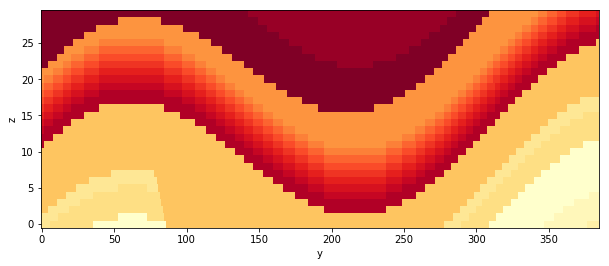

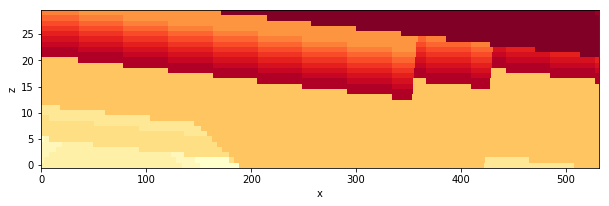

In [15]:
# create section plots in axes diretions:
PO.plot_section('x', ve = 5.,
                cmap = 'YlOrRd',
                title = '',
                colorbar = True)
                # layer_labels = PH.model_stratigraphy)
PO.plot_section('y', position = 100, ve = 5.,
                cmap = 'YlOrRd',
                title = '',
                colorbar_orientation = 'horizontal',
                layer_labels = PH.model_stratigraphy)


In [16]:
import numpy as np
np.unique(PO.block)

array([  1.,   2.,   3.,   4.,   5.,   7.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.])

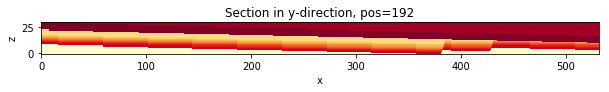

In [17]:
PO.plot_section('y')

In [12]:
# Export to VTK for 3-D visualisation and analysis
PO.export_to_vtk(vtk_filename = "GBasin_V4")

In [13]:
pwd

u'/Users/flow/git/pynoddy/docs/notebooks'

## Update model origin and extent

Test new implementation as basis for 1-D "Drillhole" export

In [13]:
reload(pynoddy.history)
reload(pynoddy.events)
PH = pynoddy.history.NoddyHistory("../../examples/GBasin_Ve1_V4_b.his")

 STRATIGRAPHY
 FOLD
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 TILT
 FOLD


In [16]:
PH.info(events_only = True)

This model consists of 14 events:
	(1) - STRATIGRAPHY
	(2) - FOLD
	(3) - UNCONFORMITY
	(4) - FAULT
	(5) - FAULT
	(6) - UNCONFORMITY
	(7) - FAULT
	(8) - FAULT
	(9) - UNCONFORMITY
	(10) - FAULT
	(11) - FAULT
	(12) - UNCONFORMITY
	(13) - TILT
	(14) - FOLD


In [34]:
PH.events[14].properties

{'Amplitude': 500.0,
 'Cylindricity': 0.0,
 'Dip': 90.0,
 'Dip Direction': 180.0,
 'Pitch': 0.0,
 'Single Fold': 'FALSE',
 'Type': 'Sine',
 'Wavelength': 17000.0,
 'X': 0.0,
 'Y': 7000.0,
 'Z': 0.0}

In [80]:
PH.write_history("GB_V4_1D.his")

In [75]:
no = pynoddy.output.NoddyOutput("tmp")

In [76]:
z_range = no.block[0,0,:]

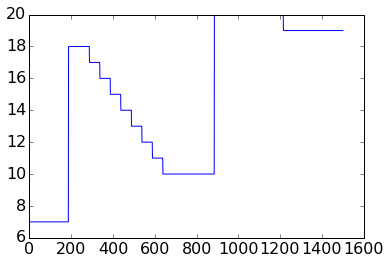

In [77]:
plot(z_range)

In [78]:
len(z_range)

1500

In [88]:
reload(pynoddy.history)
reload(pynoddy.events)
PH = pynoddy.history.NoddyHistory("../../examples/GBasin_Ve1_V4_b.his")
drillhole = PH.get_drillhole_data(10000, 10000, resolution = 100)

 STRATIGRAPHY
 FOLD
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 FAULT
 FAULT
 UNCONFORMITY
 TILT
 FOLD



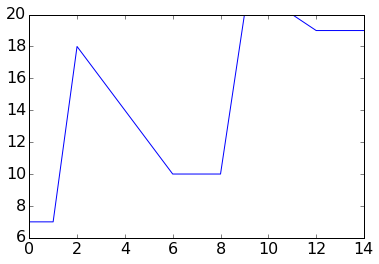

In [89]:
plot(drillhole)